<a href="https://colab.research.google.com/github/aSafarpoor/Traffic-Sign-Detection-DIPFinalProject-/blob/main/dip_project_phase0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os
from tqdm import tqdm
import subprocess

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
%cd drive/MyDrive/"DIP project"

/content/drive/MyDrive/DIP project


In [12]:
%cd data-v0

/content/drive/MyDrive/DIP project/data-v0


In [13]:
namelist = []
labellist = []

for i in tqdm(range(20)):
    os.chdir(str(i))
    output = subprocess.check_output(["ls"]).decode()
    templist = output.split('\n')
    for j in templist:
        namelist.append(str(i)+'/'+str(j))
        labellist.append(i)
    %cd ..

  5%|▌         | 1/20 [00:00<00:15,  1.25it/s]

/content/drive/MyDrive/DIP project/data-v0


 10%|█         | 2/20 [00:01<00:09,  1.85it/s]

/content/drive/MyDrive/DIP project/data-v0


 15%|█▌        | 3/20 [00:01<00:11,  1.53it/s]

/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0


 35%|███▌      | 7/20 [00:02<00:03,  3.78it/s]

/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0


100%|██████████| 20/20 [00:03<00:00,  6.16it/s]

/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0


In [14]:
ims = []
labels = []
c = -1
for name in tqdm(namelist):
    c+=1
    im = cv2.imread(name)
    try:
        len(im)<1
        ims.append(im)
        labels.append(labellist[c])
    except:
        pass
    

100%|██████████| 251/251 [02:28<00:00,  1.70it/s]


In [15]:
ims = np.array(ims)
len(ims),len(labels),ims.shape

(231, 231, (231, 32, 32, 3))

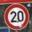

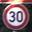

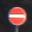

In [16]:
cv2_imshow(ims[0])
print('')
cv2_imshow(ims[10])
print('')
cv2_imshow(ims[100])


##HSV

In [34]:
!pip install Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
import colorsys

def HSVColor(img):
    shapee = img.shape
    temp = img.reshape(-1,3)
    # print(temp.shape,temp[0])
    temp2 = [colorsys.rgb_to_hsv(im[0],im[1],im[2]) for im in temp]
    img = np.array(temp2).reshape(shapee)
    img[:,:,2]/=255
    return img

In [109]:
HSVColor(np.array([[[100,200,120]]]))

array([[[0.36666667, 0.5       , 0.78431373]]])

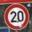

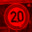

In [51]:
im = np.copy(ims[0])
cv2_imshow(im)
im = HSVColor(im)
cv2_imshow(im)

* SIGNAL BASED
* COLOR BASED
* EDGE BASED

# SIGNAL BASED

In [52]:
from scipy.fft import fft, fftfreq, fft2, ifft2

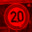

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


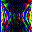

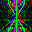

In [53]:
# im = np.copy(ims[0])
fft_img = np.fft.fft2(im)
fft_img_shift = np.fft.fftshift(fft_img)
cv2_imshow(im)
cv2_imshow(fft_img)
cv2_imshow(fft_img_shift)

In [54]:
sample = np.copy(fft_img_shift)

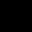

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


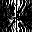

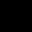

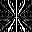

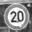

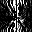

In [55]:
s0 = sample[:,:,0]
s1 = sample[:,:,1]
s2 = sample[:,:,2]

cv2_imshow(im[:,:,0])
cv2_imshow(s0)
cv2_imshow(im[:,:,1])
cv2_imshow(s1)
cv2_imshow(im[:,:,2])
cv2_imshow(s2)

((1019.6264702407852+32.64986704243856j),
 (5703.443911631902+0j),
 (1019.6264702407851-32.64986704243857j))

In [56]:
def distance(a,b):
    return round(((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5,2)

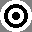

In [57]:
def func(sample):
    sample = np.copy(sample)
    s0 = sample[:,:,0]
    d1,d2 = s0.shape
    m1,m2 = (d1-1)/2,(d2-1)/2
    # print(distance([0,0],[m1,m2]))
    ths = [4,8,12,16]
    lavels_point = np.zeros((d1,d2))
    for i in range(d1):
        for j in range(d2):
            d = distance([i,j],[m1,m1])
            if d<ths[0]:
                lavels_point[i][j] = 0
            elif d<ths[1]:
                lavels_point[i][j] = 255
            elif d<ths[2]:
                lavels_point[i][j] = 0
            elif d<ths[3]:
                lavels_point[i][j] = 255
            else:
                lavels_point[i][j] = 128
    
    cv2_imshow(lavels_point)

func(sample)

In [58]:
def func(sample):
    sample = np.copy(sample)
    s0 = sample[:,:,0]
    s1 = sample[:,:,1]
    s2 = sample[:,:,2]
    d1,d2 = s1.shape
    m1,m2 = (d1-1)/2,(d2-1)/2
    # print(distance([0,0],[m1,m2]))
    ths = [4,8,12,16]
    lavels_point = [[],[],[],[],[]]
    sample = s1
    for i in range(d1):
        for j in range(d2):
            d = distance([i,j],[m1,m1])
            if d<ths[0]:
                lavels_point[0].append(sample[i][j])
            elif d<ths[1]:
                lavels_point[1].append(sample[i][j])
            elif d<ths[2]:
                lavels_point[2].append(sample[i][j])
            elif d<ths[3]:
                lavels_point[3].append(sample[i][j])
            else:
                lavels_point[4].append(sample[i][j])
    lavels_point = np.array(lavels_point)
    return lavels_point

lavels_point = func(sample)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [59]:
out = [np.mean(lavels_point[0]),np.mean(lavels_point[1]),np.mean(lavels_point[2]),np.mean(lavels_point[3]),np.mean(lavels_point[4])]
absout = list(map(abs,out))
for i in range(len(out)):
    print(out[i],'\n   ---------------------------------------> ',absout[i])
    print(out[i],'\n   ------------------------------------------------------------------> ',np.angle(out[i]))

(586.0714595332495+8.874893698694722j) 
   --------------------------------------->  586.138652041986
(586.0714595332495+8.874893698694722j) 
   ------------------------------------------------------------------>  0.015141865854353271
(131.8077180703271+3.132265554037561j) 
   --------------------------------------->  131.84493024158283
(131.8077180703271+3.132265554037561j) 
   ------------------------------------------------------------------>  0.023759429104769945
(83.96260410814266-1.039959694200337j) 
   --------------------------------------->  83.96904432459772
(83.96260410814266-1.039959694200337j) 
   ------------------------------------------------------------------>  -0.012385353326575884
(59.66866634554654+0.10140856457983063j) 
   --------------------------------------->  59.66875251882788
(59.66866634554654+0.10140856457983063j) 
   ------------------------------------------------------------------>  0.0016995262866565848
(7.507817514885866-3.4785391021743495j) 
   ------

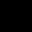

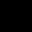

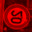

In [66]:
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]
z = np.zeros(b.shape)
cv2_imshow(np.array([r,z,z]).transpose())
cv2_imshow(np.array([z,g,z]).transpose())
cv2_imshow(np.array([z,z,b]).transpose())

In [68]:
im.shape

(32, 32, 3)

In [80]:
class feature_extraction():
    def __init__(self):
        pass
    
    @staticmethod
    def binary(img,th=0.5):
        img2 = np.copy(img)
        img2[img2>th]=1
        img2[img2<1]=0
        return img2
    
    @staticmethod
    def area(img):
        img2 = np.copy(img)
        img2 = feature_extraction.binary(img)
        return int(img2.sum())

    @staticmethod
    def char_dar_char(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
            for j in range(4):
                subim = img2[i*8:i*8+7,j*8:j*8+7]
                out.append(round(subim.sum()/64,2))
        return out
    
    @staticmethod
    def do_dar_do(img):
        img2 = np.copy(img)
        out = []
        for i in range(2):
            for j in range(2):
                subim = img2[i*16:i*16+15,j*16:j*16+15]
                out.append(round(subim.sum()/256,2))
        return out
    
    @staticmethod
    def char_axis1(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
                subim = img2[i*8:i*8+7,:]
                out.append(round(subim.sum()/256,2))
        return out
    
    @staticmethod
    def char_axis2(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
                subim = img2[:,i*8:i*8+7]
                out.append(round(subim.sum()/256,2))
        return out
    
    @staticmethod
    def vertical_edge(img):
        kernel = np.array([[1,0],[1,0]])
        afterkernel = cv2.filter2D(img,-1,kernel)
        return round(afterkernel.sum()/(1024),2)
    
    @staticmethod
    def horisental_edge(img):
        kernel1 = np.array([[1,1],[0,0]])
        kernel2 = np.array([[0,0],[1,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round((afterkernel1.sum()+afterkernel2.sum())/(1024*2),2)

    @staticmethod
    def kaj_chap_edge(img):
        kernel1 = np.array([[1,1],[1,0]])
        kernel2 = np.array([[0,1],[1,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round(afterkernel1.sum()/1024,2),round(afterkernel2.sum()/1024,2)

    @staticmethod
    def kaj_rast_edge(img):
        kernel1 = np.array([[1,0],[1,1]])
        kernel2 = np.array([[1,1],[0,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round(afterkernel1.sum()/1024,2),round(afterkernel2.sum()/1024,2)

    @staticmethod
    def run(img,th='0.5'):
        
        f = []
        f.append(feature_extraction.area(img)/1024)
        for i in feature_extraction.char_dar_char(img):
            f.append(i)
        for i in feature_extraction.do_dar_do(img):
            f.append(i)
        for i in feature_extraction.char_axis1(img):
            f.append(i)
        for i in feature_extraction.char_axis2(img):
            f.append(i)
        f.append(feature_extraction.vertical_edge(img))
        f.append(feature_extraction.horisental_edge(img))
        for i in feature_extraction.kaj_chap_edge(img):
            f.append(i)
        for i in feature_extraction.kaj_rast_edge(img):
            f.append(i)

        return np.array(f)

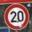

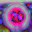

In [111]:
im = np.copy(ims[0])
cv2_imshow(im)
im = HSVColor(im)
cv2_imshow(im*255)

In [112]:
im[:,:,2].max(),im[:,:,2].min()

(1.0, 0.12941176470588237)

In [114]:
feature_extraction.run(im[:,:,1])

array([0.26757812, 0.36      , 0.45      , 0.49      , 0.28      ,
       0.29      , 0.22      , 0.13      , 0.36      , 0.25      ,
       0.14      , 0.09      , 0.34      , 0.22      , 0.32      ,
       0.23      , 0.21      , 0.38      , 0.37      , 0.28      ,
       0.25      , 0.45      , 0.29      , 0.23      , 0.28      ,
       0.32      , 0.32      , 0.26      , 0.33      , 0.72      ,
       0.72      , 1.08      , 1.07      , 1.07      , 1.08      ])